---
## **Remove bias and create a High Dimensional Dataset**
---

<font size="2">Eudald Sangenis  

The objective of this file is to create a High Dimensional dataset removing the bias of the 2 magnitude signals.

Parameters High Dimensional Dataset:  
- type_dataset: train, test 
- data_dataset:  2022_03_17 (Chico), 2022_04_25 (Chico), 2022_07_27 (Austin)
- window_number: 100, 200</font>

---
## **<font size="5">1. Libraries: </font>**
---

In [1]:
import math
import numpy as np
import pandas as pd  
from tqdm import tqdm                   
import seaborn as sns
import scipy.io as spio
import matplotlib.pyplot as plt

---
## **<font size="5">2. Parameters to modify</font>**
---

In [2]:
type_dataset = 'test'       # train, test
data_dataset = '2022_03_17' # 2022_03_17 2022_04_25 2022_07_27 2022_08_01
window_number = 400          # 50 100 200 400

In [3]:
# Folder to read the labeled and HD datasets:
dataset_path_labeled = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\2_labeled_datasets\\'+data_dataset+'\\'
dataset_path_unlabeled = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset+'\\'

In [4]:
# Folder to save HD datsets:
save_dataset_path = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset+'\\'

---
## **<font size="5">3. Label HD datasets:</font>**
---

In [5]:
print('Reading dataset '+data_dataset+' ...')
# Load the 2 sig labeled dataset - take label and concat to HD dataset
df_l = pd.read_csv(dataset_path_labeled + '2sig_'+type_dataset+'_df.csv')
# Load the HD dataset
df   = pd.read_csv(dataset_path_unlabeled + 'HD_'+str(window_number)+'_6sig_'+type_dataset+'.csv')
print('Reading done!')

if 'Unnamed: 0' in df:   df   = df.drop(['Unnamed: 0'], axis=1)
if 'Unnamed: 0' in df_l: df_l = df_l.drop(['Unnamed: 0'], axis=1)

print('Shapes df & df_l:')
print(df.shape, df_l.shape)

Reading dataset 2022_03_17 ...
Reading done!
Shapes df & df_l:
(309581, 2406) (309981, 5)


In [6]:
df.head(2)

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,0.054496,0.013683,-0.966700,-0.000652,0.002393,0.021989,0.055462,0.012649,-0.967454,-0.001081,...,-0.964826,0.009411,0.001368,0.019687,0.051930,0.014911,-0.966590,0.010454,0.001338,0.019556
1,0.055462,0.012649,-0.967454,-0.001081,0.001593,0.021492,0.055335,0.012900,-0.966855,-0.000744,...,-0.966590,0.010454,0.001338,0.019556,0.051846,0.015718,-0.968073,0.011380,0.001015,0.019892


In [7]:
df_l.head(2)

,Unnamed: 0.1,timestamp,acc,gyro,label
0,0,0.030625,0.966902,0.020822,ZUPT
1,1,0.031875,0.966936,0.020813,ZUPT


In [8]:
df = pd.concat([df, df_l.loc[window_number:,['label']].reset_index().drop(['index'],axis=1)], axis=1)
# del df_l
df

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0,label
0,0.054496,0.013683,-0.966700,-0.000652,0.002393,0.021989,0.055462,0.012649,-0.967454,-0.001081,...,0.009411,0.001368,0.019687,0.051930,0.014911,-0.966590,0.010454,0.001338,0.019556,ZUPT
1,0.055462,0.012649,-0.967454,-0.001081,0.001593,0.021492,0.055335,0.012900,-0.966855,-0.000744,...,0.010454,0.001338,0.019556,0.051846,0.015718,-0.968073,0.011380,0.001015,0.019892,ZUPT
2,0.055335,0.012900,-0.966855,-0.000744,0.001462,0.021069,0.055307,0.013113,-0.966312,0.000032,...,0.011380,0.001015,0.019892,0.052267,0.016595,-0.967782,0.011695,0.000815,0.019759,ZUPT
3,0.055307,0.013113,-0.966312,0.000032,0.001752,0.020630,0.056035,0.014941,-0.965898,0.000640,...,0.011695,0.000815,0.019759,0.053329,0.016773,-0.966223,0.011471,0.000669,0.019931,ZUPT
4,0.056035,0.014941,-0.965898,0.000640,0.002589,0.020460,0.055801,0.015606,-0.964600,0.001020,...,0.011471,0.000669,0.019931,0.054567,0.015816,-0.965044,0.011502,0.000922,0.020266,ZUPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309576,0.047076,0.051650,-0.972138,0.005613,0.007402,0.017828,0.047087,0.050004,-0.971723,0.005848,...,0.009922,0.002555,0.017444,0.047317,0.050851,-0.971659,0.009881,0.002747,0.017917,ZUPT
309577,0.047087,0.050004,-0.971723,0.005848,0.007013,0.017938,0.046883,0.049281,-0.973301,0.006027,...,0.009881,0.002747,0.017917,0.046905,0.050681,-0.971899,0.009774,0.003047,0.018088,ZUPT
309578,0.046883,0.049281,-0.973301,0.006027,0.006410,0.018375,0.046447,0.049650,-0.974540,0.006148,...,0.009774,0.003047,0.018088,0.046916,0.051412,-0.970592,0.009553,0.003168,0.018436,ZUPT
309579,0.046447,0.049650,-0.974540,0.006148,0.006515,0.018616,0.045651,0.050214,-0.974378,0.005767,...,0.009553,0.003168,0.018436,0.046765,0.053066,-0.970593,0.009953,0.002888,0.018851,ZUPT


<font size="2">Save HD dataset:</font>

In [9]:
df.to_csv(save_dataset_path + 'HD_'+str(window_number)+'_6sig_'+type_dataset+'.csv')

---
## **<font size="5">4. Remove Bias:</font>**
---

<font size="2">Compute the bias of the first 800 values (1s) of the labeled datset:</font>

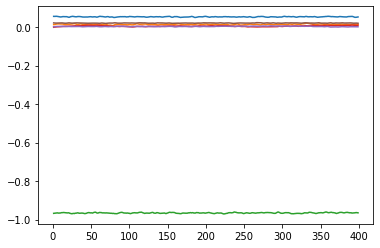

In [10]:
del df_l
plt.plot(df.index[1:400],  df[['acc1_t'+str(window_number),'acc2_t'+str(window_number),'acc3_t'+str(window_number),'gyro1_t'+str(window_number),'gyro2_t'+str(window_number),'gyro3_t'+str(window_number)]].iloc[1:400])

In [11]:
bias_acc_1 = np.mean(df['acc1_t'+str(window_number)].iloc[1:400])
bias_acc_2 = np.mean(df['acc2_t'+str(window_number)].iloc[1:400])
bias_acc_3 = np.mean(df['acc3_t'+str(window_number)].iloc[1:400])
bias_gyr_1 = np.mean(df['gyro1_t'+str(window_number)].iloc[1:400])
bias_gyr_2 = np.mean(df['gyro2_t'+str(window_number)].iloc[1:400])
bias_gyr_3 = np.mean(df['gyro3_t'+str(window_number)].iloc[1:400])
[bias_acc_1, bias_acc_2, bias_acc_3, bias_gyr_1, bias_gyr_2, bias_gyr_3]

[0.05309696631909918,
 0.013716633459551394,
 -0.9654005259649264,
 0.004939028251323904,
 0.003033881798165395,
 0.020732589814326706]

<AxesSubplot:>

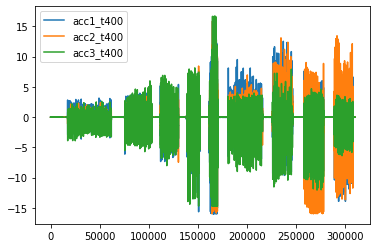

In [12]:
for i in range(0,window_number+1):
    df[f'acc1_t{i}']  = df[f'acc1_t{i}']  - bias_acc_1
    df[f'gyro1_t{i}'] = df[f'gyro1_t{i}'] - bias_gyr_1
    df[f'acc2_t{i}']  = df[f'acc2_t{i}']  - bias_acc_2
    df[f'gyro2_t{i}'] = df[f'gyro2_t{i}'] - bias_gyr_2
    df[f'acc3_t{i}']  = df[f'acc3_t{i}']  - bias_acc_3
    df[f'gyro3_t{i}'] = df[f'gyro3_t{i}'] - bias_gyr_3

df.plot(y = ['acc1_t'+str(window_number), 'acc2_t'+str(window_number), 'acc3_t'+str(window_number)], use_index = True)

<AxesSubplot:>

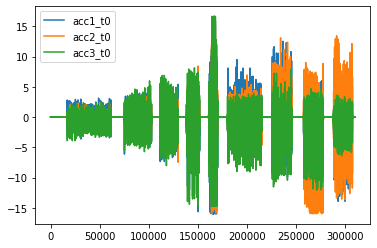

In [13]:
df.plot(y = ['acc1_t0', 'acc2_t0', 'acc3_t0'], use_index = True)

In [14]:
df.to_csv(save_dataset_path + 'HD_'+str(window_number)+'_6sig_'+type_dataset+'_no_Bias.csv')

In [15]:
df

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0,label
0,0.001399,-0.000034,-0.001299,-0.005591,-0.000641,0.001256,0.002365,-0.001068,-0.002053,-0.006020,...,0.004472,-0.001666,-0.001046,-0.001167,0.001194,-0.001189,0.005515,-0.001696,-0.001177,ZUPT
1,0.002365,-0.001068,-0.002053,-0.006020,-0.001441,0.000759,0.002238,-0.000817,-0.001454,-0.005683,...,0.005515,-0.001696,-0.001177,-0.001251,0.002001,-0.002673,0.006441,-0.002018,-0.000841,ZUPT
2,0.002238,-0.000817,-0.001454,-0.005683,-0.001572,0.000336,0.002210,-0.000603,-0.000912,-0.004907,...,0.006441,-0.002018,-0.000841,-0.000830,0.002878,-0.002382,0.006756,-0.002219,-0.000974,ZUPT
3,0.002210,-0.000603,-0.000912,-0.004907,-0.001282,-0.000103,0.002938,0.001224,-0.000497,-0.004299,...,0.006756,-0.002219,-0.000974,0.000232,0.003056,-0.000822,0.006532,-0.002365,-0.000801,ZUPT
4,0.002938,0.001224,-0.000497,-0.004299,-0.000445,-0.000273,0.002704,0.001889,0.000801,-0.003919,...,0.006532,-0.002365,-0.000801,0.001470,0.002099,0.000357,0.006562,-0.002112,-0.000466,ZUPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309576,-0.006021,0.037933,-0.006738,0.000674,0.004368,-0.002905,-0.006010,0.036287,-0.006323,0.000909,...,0.004983,-0.000479,-0.003288,-0.005780,0.037135,-0.006258,0.004942,-0.000287,-0.002816,ZUPT
309577,-0.006010,0.036287,-0.006323,0.000909,0.003979,-0.002795,-0.006214,0.035564,-0.007901,0.001088,...,0.004942,-0.000287,-0.002816,-0.006192,0.036964,-0.006498,0.004835,0.000013,-0.002644,ZUPT
309578,-0.006214,0.035564,-0.007901,0.001088,0.003376,-0.002358,-0.006650,0.035933,-0.009139,0.001209,...,0.004835,0.000013,-0.002644,-0.006181,0.037695,-0.005191,0.004614,0.000135,-0.002296,ZUPT
309579,-0.006650,0.035933,-0.009139,0.001209,0.003481,-0.002117,-0.007446,0.036497,-0.008977,0.000828,...,0.004614,0.000135,-0.002296,-0.006332,0.039350,-0.005193,0.005014,-0.000146,-0.001881,ZUPT
